In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import svm
from sklearn.metrics import classification_report

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

Loading Data

In [5]:
training_data = pd.read_csv("IA3-train.csv")

In [6]:
text = training_data['text']

# Part 0: preprocessing

a) CountVectorizer function in sklearn to generate a feature vector for each tweet where the element of the vector tracks the number of times a specific word appears in the tweet

negative sentiment array -> text for negative sentiment
positive sentiment array
for i in number of rows in trainig data
if train_data["sentiment"][i] == 0
    negative_array = train_data['test'][i]

In [7]:
negative_array = []
positive_array = []

In [8]:
for i in range(0,9000):
    if(training_data['sentiment'][i] == 0):
        negative_array.append(training_data['text'][i])
    elif(training_data['sentiment'][i] == 1):
        positive_array.append(training_data['text'][i])

In [9]:
negative_array
print(len(negative_array))

7167


In [10]:
positive_array
print(len(positive_array))

1833


In [11]:
# Create two Vectorizer Object
store_vectors_pos = CountVectorizer()
store_vectors_neg = CountVectorizer()

In [12]:
fot_vals = store_vectors_pos.fit_transform(positive_array)
#pos_dict = store_vectors_pos.vocabulary_
print(store_vectors_pos.get_feature_names_out())

['000' '0hxlnvzknp' '0liwecasoe' ... 'zgoqoxjbqy' 'zo2iceg4li' 'zone']


In [13]:
vals = store_vectors_pos.get_feature_names_out()
di_pos = {idx:val for idx,val in enumerate(vals)}

In [14]:
top = np.argsort(sum([i for i in fot_vals.toarray()]))[:10]

In [15]:
print(top) #indices

[3905 1946 1948 1949 1950 3904 1953 1954 1956 1957]


Positive Sentiment text

In [16]:
print([di_pos[i] for i in top])

['zone', 'jan', 'janna', 'jannasaurusrex', 'jasonwhitely', 'zo2iceg4li', 'jdbwaffles', 'jeanette', 'jeff', 'jeff_hofmann']


In [17]:
count = sorted(sum([i for i in fot_vals.toarray()]), reverse = True)
print(count[:10])

[746, 716, 716, 504, 462, 455, 452, 414, 355, 330]


In [18]:
fot_vals_neg = store_vectors_neg.fit_transform(negative_array)
#pos_dict = store_vectors_pos.vocabulary_
print(store_vectors_neg.get_feature_names_out())

['00' '000' '000419' ... 'zv6cfpohl5' 'zvfmxnuelj' 'zzps5ywve2']


In [19]:
neg_vals = store_vectors_neg.get_feature_names_out()
di_neg = {idx:val for idx,val in enumerate(neg_vals)}

Negative Sentiment text

In [20]:
top_neg = np.argsort(sum([i for i in fot_vals_neg.toarray()]))[:10]
print([di_neg[i] for i in top_neg])

['inhumane', 'makers', 'makeovertime', 'majority', 'mait', 'maintenece', 'mainline', 'maine', 'mails', 'mailbox']


In [21]:
count = sorted(sum([i for i in fot_vals_neg.toarray()]), reverse = True)
print(count[:10])

[4741, 3236, 2313, 2254, 2202, 2191, 2130, 2104, 1926, 1885]


b) TfidfVectorizer function in sklearn to generate the TF-IDF(term frequency-inverse
document frequency)

In [22]:
pos_tfid_vector = TfidfVectorizer()
neg_tfid_vector = TfidfVectorizer()

Positive Sentiment text

In [23]:
tfidf_pos = pos_tfid_vector.fit_transform(positive_array)

In [26]:
tfidf_pos_tokens = pos_tfid_vector.get_feature_names_out()

In [27]:
top_pos_tfid = sum([i for i in tfidf_pos.toarray()])

In [28]:
for i in range(len(positive_array)):
    df_pos_tfidfvect = pd.DataFrame(data = top_pos_tfid.reshape(1, 3906),index = ['Train Data'],columns = tfidf_pos_tokens)

In [29]:
print(df_pos_tfidfvect.sort_values(by='Train Data', axis = 1, ascending = False))

                   you     thanks      thank        the    jetblue     united  \
Train Data  110.878255  91.690793  86.898123  81.972999  81.193956  73.534057   

                   to  southwestair        for  americanair  ...   overall  \
Train Data  73.418059     72.432877  64.760124    60.998724  ...  0.249234   

            improved      1786      dc10        q2   jms2802       486  \
Train Data  0.249234  0.249234  0.244128  0.239328  0.218668  0.200072   

                 c19      2017       roc  
Train Data  0.200072  0.200072  0.200072  

[1 rows x 3906 columns]


Negative Sentiment text

In [30]:
tfidf_neg = neg_tfid_vector.fit_transform(negative_array)

In [31]:
tfidf_neg_tokens = neg_tfid_vector.get_feature_names_out()

In [32]:
print(tfidf_neg_tokens)

['00' '000' '000419' ... 'zv6cfpohl5' 'zvfmxnuelj' 'zzps5ywve2']


In [30]:
top_neg_tfid = sum([i for i in tfidf_neg.toarray()])

In [31]:
for i in range(len(negative_array)):
    df_neg_tfidfvect = pd.DataFrame(data = top_neg_tfid.reshape(1, 9472),index = ['Train Data'],columns = tfidf_neg_tokens)

In [32]:
print(df_neg_tfidfvect.sort_values(by='Train Data', axis = 1, ascending = False))

                    to         the      flight         you      united  \
Train Data  359.290684  295.371058  241.583716  238.115129  237.011208   

                    on         and       for   usairways          my  ...  \
Train Data  229.748965  222.175481  221.4167  214.980425  214.865174  ...   

              connex      3494      5644      5491        04  whatsoever  \
Train Data  0.231916  0.231916  0.231916  0.231916  0.227636    0.213749   

            unitedairline        9a       rly       11a  
Train Data       0.213749  0.205784  0.205784  0.205784  

[1 rows x 9472 columns]


# Part 1: Linear SVM

In [33]:
x_train = training_data['text']
y_train = training_data['sentiment']

max_dffloat or int, default=1.0
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float in range [0.0, 1.0], the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

min_dffloat or int, default=1
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float in range of [0.0, 1.0], the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

sublinear_tfbool, default=False
Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf)

use_idfbool, default=True
Enable inverse-document-frequency reweighting. If False, idf(t) = 1.

In [34]:
vectorizer = TfidfVectorizer(use_idf = True, 
                             lowercase = True)
train_vectors = vectorizer.fit_transform(training_data['text'])

In [35]:
validation_data = pd.read_csv("IA3-dev.csv")
test_vectors = vectorizer.transform(validation_data['text'])

In [36]:
accuracy_linear = []

In [37]:
for i in range(-7,7): #C range
    linear_svm = svm.SVC(kernel ='linear', C = 10**i).fit(train_vectors, y_train)
    prediction1 = linear_svm.predict(train_vectors)
    report = classification_report(training_data['sentiment'], prediction1, output_dict=True)
    accuracy_linear.append(report['accuracy'])
    #print("penalty: ", 10**i)
    #print('positive: ', report['1'])
    #print('negative: ', report['0'])

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [38]:
penalty = [10**i for i in range(-7,7)]

In [39]:
def plot_accuracy_penalty(accuracy_linear,penalty):
    
    plt.figure(figsize=(11, 6), dpi=80)
    size = len(penalty)
    x = list(range(size))
    plt.plot(x, accuracy_linear, label='Accuracy', marker='d')
    _=plt.xticks(x, penalty)
    plt.xlabel("Penalty")
    plt.ylabel("Accuracy")
    plt.legend(['Accuracy'])
    plt.title('Penalty vs Accuracy')
       
    return

In [40]:
def plot_nvectors_penalty(nsupport_linear,penalty):
    
    plt.figure(figsize=(11, 6), dpi=80)
    size = len(penalty)
    x = list(range(size))
    plt.plot(x, nsupport_linear, label='Number of Support Ventors', marker='d')
    #plt.plot(x, acc, label='Valid Accuracy', marker='d')
    _=plt.xticks(x, penalty)
    plt.xlabel("Penalty")
    plt.ylabel("Number of Support Ventors")
    plt.legend(['Number of Support Ventors'])
    plt.title('Penalty vs Number of Support Ventors')
       
    return

Plot for Training Dataset

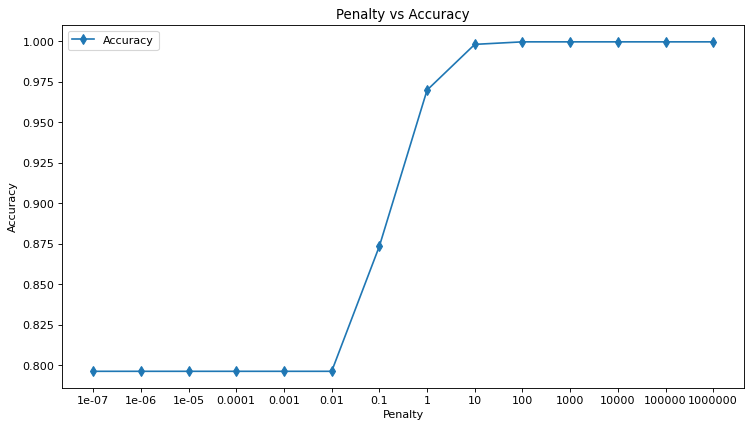

In [41]:
plot_accuracy_penalty(accuracy_linear,penalty)

In [42]:
test_accuracy_linear = []
test_n_supportvectors = []

In [43]:
for i in range(-7,7): #C range
    linear_svm = svm.SVC(kernel ='linear', C = 10**i)
    training_model = linear_svm.fit(train_vectors, y_train)
    prediction_validation = linear_svm.predict(test_vectors)
    validation_report = classification_report(validation_data['sentiment'], prediction_validation, output_dict=True)
    test_accuracy_linear.append(validation_report['accuracy'])
    test_n_supportvectors.append(linear_svm.n_support_[0]+linear_svm.n_support_[1])
    #print("penalty: ", 10**i)
    #print('positive: ', validation_report['1'])
    #print('negative: ', validation_report['0'])
    

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Plot for Validation Dataset

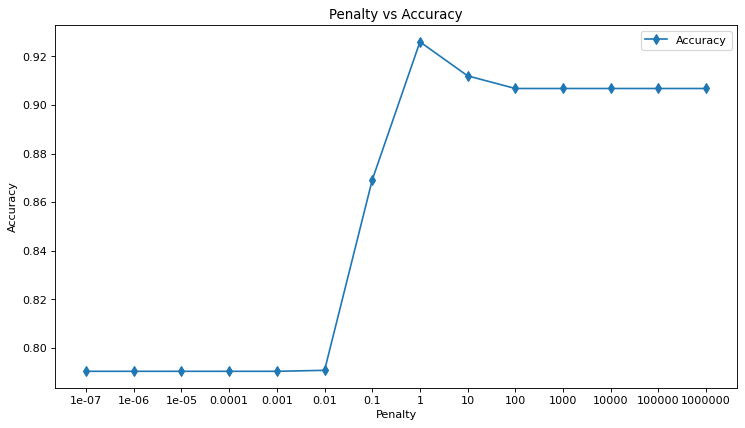

In [44]:
plot_accuracy_penalty(test_accuracy_linear,penalty)

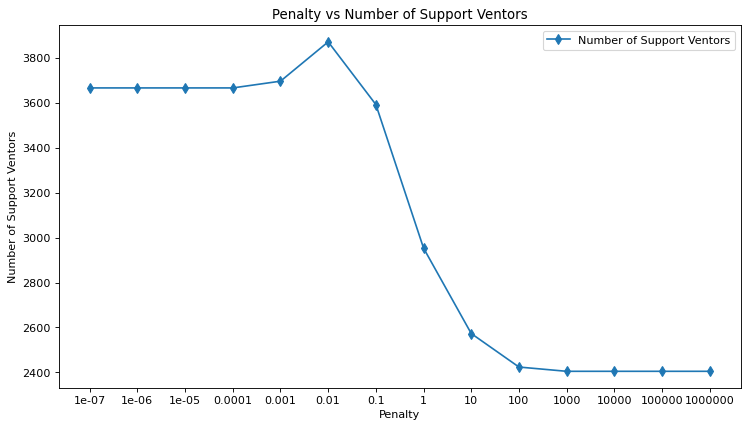

In [45]:
plot_nvectors_penalty(test_n_supportvectors,penalty)

# Part 2. Quadratic SVM

In [46]:
train_accuracy_poly = []

In [47]:
for i in range(-7,7): #C range
    linear_svm = svm.SVC(kernel ='poly', degree=2, C = 10**i).fit(train_vectors, y_train)
    prediction1 = linear_svm.predict(train_vectors)
    report = classification_report(training_data['sentiment'], prediction1, output_dict=True)
    train_accuracy_poly.append(report['accuracy'])
    #print("penalty: ", 10**i)
    #print('positive: ', report['1'])
    #print('negative: ', report['0'])

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Plot for Training Dataset

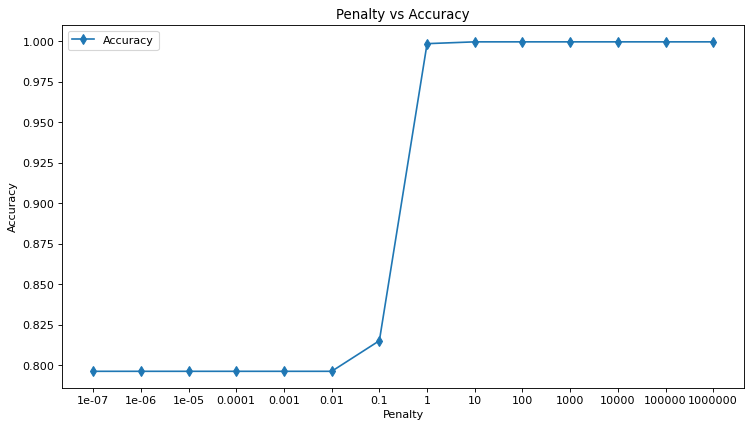

In [48]:
plot_accuracy_penalty(train_accuracy_poly,penalty)

In [49]:
test_accuracy_poly = []
test_n_supportvectors_poly = []

In [50]:
for i in range(-7,7): #C range
    quadratic_svm = svm.SVC(kernel ='poly', degree=2, C = 10**i)
    training_model = quadratic_svm.fit(train_vectors, y_train)
    prediction_validation = quadratic_svm.predict(test_vectors)
    validation_report = classification_report(validation_data['sentiment'], prediction_validation, output_dict=True)
    test_accuracy_poly.append(validation_report['accuracy'])
    test_n_supportvectors_poly.append(quadratic_svm.n_support_[0]+quadratic_svm.n_support_[1])
    #print("penalty: ", 10**i)
    #print('positive: ', validation_report['1'])
    #print('negative: ', validation_report['0'])

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Plot for Validation Dataset

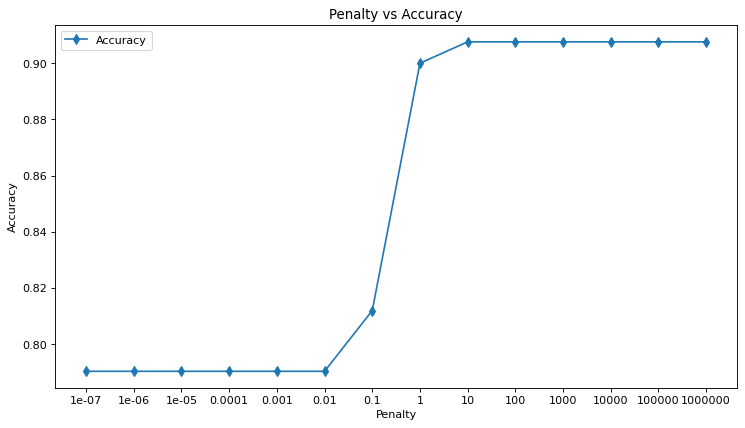

In [51]:
plot_accuracy_penalty(test_accuracy_poly,penalty)

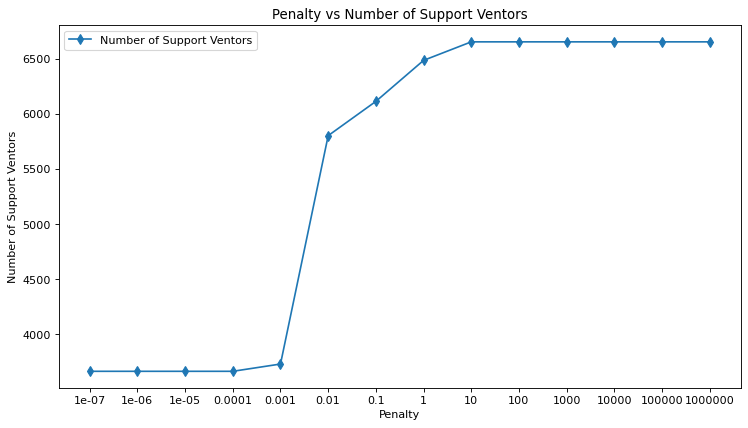

In [52]:
plot_nvectors_penalty(test_n_supportvectors_poly,penalty)

# Experimenting with "coef0" parameter for polynomial kernel for Validation Dataset

In [53]:
exp_n_sv_poly = []

In [54]:
for i in range(30,45): #C range
    quadratic_svm = svm.SVC(kernel ='poly', degree=2, C = 10, coef0 = i)
    training_model = quadratic_svm.fit(train_vectors, y_train)
    prediction_validation = quadratic_svm.predict(test_vectors)
    validation_report = classification_report(validation_data['sentiment'], prediction_validation, output_dict=True)
    exp_n_sv_poly.append(quadratic_svm.n_support_[0]+quadratic_svm.n_support_[1])
    #print("penalty: ", 10**i)
    #print('positive: ', validation_report['1'])
    #print('negative: ', validation_report['0'])

In [55]:
print(exp_n_sv_poly)

[2548, 2543, 2541, 2536, 2538, 2535, 2534, 2532, 2533, 2526, 2526, 2524, 2521, 2520, 2515]


Testing the effects of coef0(=40) for a subset of "C" values

In [56]:
penalty2 =[10**i for i in range(-5,5)]
test_accuracy_poly2 = []
test_n_supportvectors_poly2 = []
for i in range(-5,5): #C range
    quadratic_svm = svm.SVC(kernel ='poly', degree=2, C = 10**i, coef0 = 40)
    training_model = quadratic_svm.fit(train_vectors, y_train)
    prediction_validation = quadratic_svm.predict(test_vectors)
    validation_report = classification_report(validation_data['sentiment'], prediction_validation, output_dict=True)
    test_accuracy_poly2.append(validation_report['accuracy'])
    test_n_supportvectors_poly2.append(quadratic_svm.n_support_[0]+quadratic_svm.n_support_[1])

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

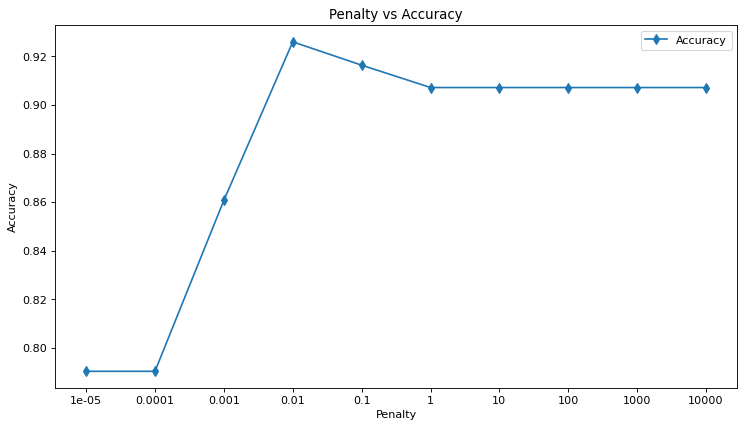

In [57]:
plot_accuracy_penalty(test_accuracy_poly2,penalty2)

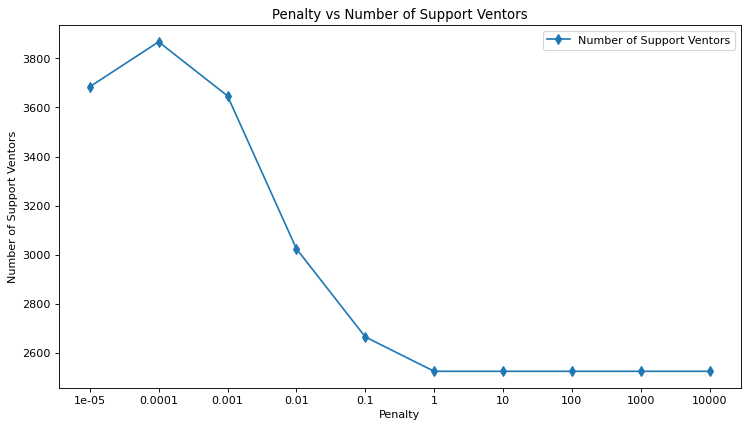

In [58]:
plot_nvectors_penalty(test_n_supportvectors_poly2,penalty2)

# Part 3: SVM with RBF kernel 

In [59]:
import seaborn as sn

In [60]:
penalty = [10**i for i in range(-7,7)]

In [61]:
gamma = [10**i for i in range(-7,4)]

Following Code for plotting haetmap for training dataset

In [62]:
train_accuracy_rbf = np.empty((len(gamma), len(penalty)))

In [63]:
for i in range(0,len(penalty)):
    for j in range(0,len(gamma)):
        rbf_svm = svm.SVC(kernel ='rbf', C = penalty[i], gamma=gamma[j])
        training_model = rbf_svm.fit(train_vectors, y_train)
        prediction_validation = rbf_svm.predict(train_vectors)
        validation_report = classification_report(training_data['sentiment'], prediction_validation, output_dict=True)
        train_accuracy_rbf[j][i] = validation_report['accuracy']

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [64]:
train_df_heatmap = pd.DataFrame(train_accuracy_rbf, index = [10**i for i in range(-7,4)], #gamma range
                  columns = [10**i for i in range(-7,7)]) # C range

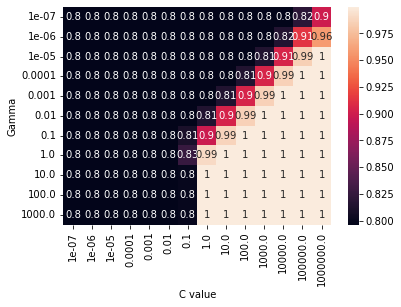

In [65]:
# plotting the heatmap
train_hm = sn.heatmap(data = train_df_heatmap, annot = True)
train_hm.set(xlabel='C value', ylabel='Gamma')
  
# displaying the plotted heatmap
plt.show()

In [66]:
train_gamma_refine = [10**i for i in np.arange(-1,0.5,0.2)]
train_penalty_refine = [10**i for i in np.arange(1,2,0.2)]

In [67]:
train_accuracy_refine_rbf = np.empty((len(train_gamma_refine), len(train_penalty_refine)))

In [68]:
for i in range(0,len(train_penalty_refine)):
    for j in range(0,len(train_gamma_refine)):
        rbf_svm = svm.SVC(kernel ='rbf', C = train_penalty_refine[i], gamma = train_gamma_refine[j])
        training_model = rbf_svm.fit(train_vectors, y_train)
        prediction_validation = rbf_svm.predict(train_vectors)
        validation_report = classification_report(training_data['sentiment'], prediction_validation, output_dict=True)
        train_accuracy_refine_rbf[j][i] = validation_report['accuracy']

In [69]:
train_df_heatmap_expanded = pd.DataFrame(train_accuracy_refine_rbf, index = [10**i for i in np.arange(-1,0.5,0.2)], #gamma range
                  columns = [10**i for i in np.arange(1,2,0.2)]) # C range

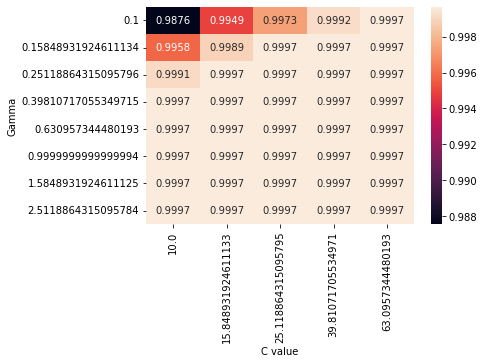

In [70]:
# plotting the heatmap
train_hm = sn.heatmap(data = train_df_heatmap_expanded, annot = True, fmt=".4f")
train_hm.set(xlabel='C value', ylabel='Gamma')
  
# displaying the plotted heatmap
plt.show()

Following Code for plotting haetmap for Validation dataset

In [71]:
accuracy_rbf = np.empty((len(gamma), len(penalty)))

In [72]:
for i in range(0,len(penalty)):
    for j in range(0,len(gamma)):
        rbf_svm = svm.SVC(kernel ='rbf', C = penalty[i], gamma=gamma[j])
        training_model = rbf_svm.fit(train_vectors, y_train)
        prediction_validation = rbf_svm.predict(test_vectors)
        validation_report = classification_report(validation_data['sentiment'], prediction_validation, output_dict=True)
        accuracy_rbf[j][i] = validation_report['accuracy']
        #print("penalty: ", 10**i)
        #print('positive: ', validation_report['1'])
        #print('negative: ', validation_report['0'])

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adita\anaconda3\envs\PytorchandScikit\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

KeyboardInterrupt: 

In [ ]:
df_heatmap = pd.DataFrame(accuracy_rbf, index = [10**i for i in range(-7,4)], #gamma range
                  columns = [10**i for i in range(-7,7)]) # C range

In [ ]:
# plotting the heatmap
hm = sn.heatmap(data = df_heatmap, annot = True)
hm.set(xlabel='C value', ylabel='Gamma')
  
# displaying the plotted heatmap
plt.show()

Expanded grid - more niche 

In [ ]:
gamma_refine = [10**i for i in np.arange(-1,0.5,0.2)]
penalty_refine = [10**i for i in np.arange(1,2,0.2)]

In [ ]:
accuracy_refine_rbf = np.empty((len(gamma_refine), len(penalty_refine)))

In [ ]:
for i in range(0,len(penalty_refine)):
    for j in range(0,len(gamma_refine)):
        rbf_svm = svm.SVC(kernel ='rbf', C = penalty_refine[i], gamma=gamma_refine[j])
        training_model = rbf_svm.fit(train_vectors, y_train)
        prediction_validation = rbf_svm.predict(test_vectors)
        validation_report = classification_report(validation_data['sentiment'], prediction_validation, output_dict=True)
        accuracy_refine_rbf[j][i] = validation_report['accuracy']
        #print("penalty: ", 10**i)
        #print('positive: ', validation_report['1'])
        #print('negative: ', validation_report['0'])

In [ ]:
df_heatmap_expanded = pd.DataFrame(accuracy_refine_rbf, index = [10**i for i in np.arange(-1,0.5,0.2)], #gamma range
                  columns = [10**i for i in np.arange(1,2,0.2)]) # C range

In [ ]:
# plotting the heatmap
hm = sn.heatmap(data = df_heatmap_expanded, annot = True, fmt=".4f")
hm.set(xlabel='C value', ylabel='Gamma')
  
# displaying the plotted heatmap
plt.show()

In [ ]:
test_nvectors_rbf = []

In [ ]:
for i in range(-7,7): #C range
    rbf_svm = svm.SVC(kernel ='rbf', C = 10**i, gamma=0.1)
    training_model = rbf_svm.fit(train_vectors, y_train)
    prediction_validation = rbf_svm.predict(test_vectors)
    validation_report = classification_report(validation_data['sentiment'], prediction_validation, output_dict=True)
    test_nvectors_rbf.append(rbf_svm.n_support_[0]+rbf_svm.n_support_[1])
    #print("penalty: ", 10**i)
    #print('positive: ', validation_report['1'])
    #print('negative: ', validation_report['0'])

for gamma = 0.1

In [ ]:
plot_nvectors_penalty(test_nvectors_rbf,penalty)

In [ ]:
test_nvectors_rbf = []

In [ ]:
for i in range(-7,4):
    rbf_svm = svm.SVC(kernel ='rbf', C = 10, gamma=10**i)
    training_model = rbf_svm.fit(train_vectors, y_train)
    prediction_validation = rbf_svm.predict(test_vectors)
    validation_report = classification_report(validation_data['sentiment'], prediction_validation, output_dict=True)
    test_nvectors_rbf.append(rbf_svm.n_support_[0]+rbf_svm.n_support_[1])
    #print("penalty: ", 10**i)
    #print('positive: ', validation_report['1'])
    #print('negative: ', validation_report['0'])

In [ ]:
def plot_nvectors_gamma(nsupport_linear,gamma):
    
    plt.figure(figsize=(11, 6), dpi=80)
    size = len(gamma)
    x = list(range(size))
    plt.plot(x, nsupport_linear, label='Number of Support Ventors', marker='d')
    _=plt.xticks(x, gamma)
    plt.xlabel("Gamma")
    plt.ylabel("Number of Support Ventors")
    plt.legend(['Number of Support Ventors'])
    plt.title('Gamma vs Number of Support Ventors')
       
    return

For c = 10

In [ ]:
plot_nvectors_gamma(test_nvectors_rbf,gamma)